## 朴素贝叶斯

In [6]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp

Accuracy:99.5%


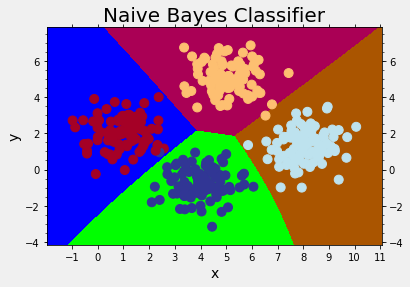

In [10]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y)

def train_model(x,y):
    model = nb.GaussianNB()
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('Naive Bayes Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='brg')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    mp.scatter(x[:,0],x[:,1],c=y,cmap='RdYlBu',s=80)
    mp.show()
    
def main():
    x,y = read_data('multiple1.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    model = train_model(x,y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_y = pred_model(model,x)
    eval_ac(y,pred_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    return 0

if __name__ == '__main__':
    main()
    
